In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_keras import *
from keras.datasets import cifar10

In [2]:
names_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 
              3: 'cat', 4: 'deer', 5: 'dog', 
              6: 'frog', 7: 'horse', 8: 'ship', 
              9: 'truck'}
              
(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()


# summarize loaded dataset
print('Train: X=%s, y=%s' % (Xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (Xtest.shape, ytest.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [3]:
def process(X):
    X_norm = X.reshape(len(X), X[0].size).astype(float)
    X_norm -= np.mean(X)
    X_norm /= np.std(X).astype(float)
    X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm)).astype(float)
    return X_norm

In [4]:
Xtrain_n = process(Xtrain)

: 

: 

In [4]:

Xtest_n = process(Xtest)

testdata = [Xtest_n, ytest]

print(Xtrain_n.shape, ytrain.shape)

: 

: 

In [ ]:
reg1 = regularizers.L2(lambda_=0.01)
reg2 = regularizers.L2(lambda_=0.01)
reg3 = regularizers.L2(lambda_=0.01)

model = models.Network()

model.add(layers.Input(Xtrain_n.shape[1], reg=reg1), scale=.01)
model.add(layers.Dense(100, activation=activations.RELU(), reg=reg2), scale=.01)
model.add(layers.Dense(100, activation=activations.RELU(),reg=reg3), scale=.01)
model.add(layers.LastLayer(10, activation=activations.linear()))
model.printLayers()

Layer 0: <class 'my_keras.layers.Input'>, neurons: 3073
Layer 1: <class 'my_keras.layers.Dense'>, neurons: 100
Layer 2: <class 'my_keras.layers.Dense'>, neurons: 100
Layer 3: <class 'my_keras.layers.LastLayer'>, neurons: 10


In [ ]:
loss_hist = model.fit(Xtrain_n, ytrain, loss=losses.MSE_img(), opt=optimizers.SGD(alpha=.01), 
                      metric=metrics.acc_img, testdata=testdata, epochs=20, batch_size=50)

Epoch 0, Train loss: 0.5006
 Accuracy test: 14.77
Epoch 5, Train loss: 0.4228
 Accuracy test: 34.34
Epoch 10, Train loss: 0.3892
 Accuracy test: 41.20
Epoch 15, Train loss: 0.3745
 Accuracy test: 45.12
Epoch 20, Train loss: 0.3660
 Accuracy test: 47.86
Epoch 25, Train loss: 0.3605
 Accuracy test: 49.41
Epoch 30, Train loss: 0.3571
 Accuracy test: 50.20
Epoch 35, Train loss: 0.3551
 Accuracy test: 50.30
Epoch 40, Train loss: 0.3536
 Accuracy test: 50.99
Epoch 45, Train loss: 0.3525
 Accuracy test: 51.15


56.538 51.629999999999995


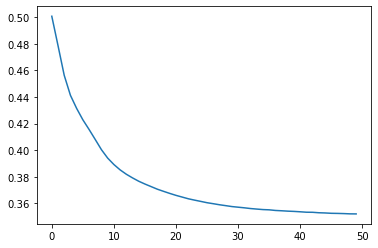

In [7]:
plt.plot(loss_hist)
print(100*metrics.acc_img(model.predict(Xtrain_n), ytrain), 
      100*metrics.acc_img(model.predict(Xtest_n), ytest))
